# Instalação de bibliotecas

In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
 pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Inteli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Inteli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Inteli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Abrindo o dataframe inicial

In [41]:
df2 = pd.read_csv('../output/sentimento_revisto.csv', index_col=0)
df2 = df2.drop('texto_tokenizado2', axis=1)
df2

,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink,texto_e_palavra,texto_tokenizado,sentimento_revisto
autor,,,,,,,,,,,
lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0,Minuto touro de ouro,"['minuto', 'touro', 'ouro']",1
vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0,@ricktolledo Sim,['sim'],0
ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário,0,20,https://www.instagram.com/p/CapXhB5Lvas/#17935...,0,0,Queria saber se a Btg banking é a própria btg ...,"['queria', 'saber', 'banking', 'própria']",1
paularodrigues.invest,👏👏👏👏,NEUTRAL,comentário,0,15,https://www.instagram.com/p/CaptWrtOT8U/#17943...,0,0,palmas palmas palmas palmas,"['palmas', 'palmas', 'palmas', 'palmas']",1
rafael_miller,Vamos ajudar o Brasil na principal categoria d...,POSITIVE,comentário,0,41,https://www.instagram.com/p/CapoqJ3Ne7a/#17972...,0,0,Vamos ajudar o Brasil na principal categoria d...,"['vamos', 'ajudar', 'brasil', 'principal', 'ca...",1
...,...,...,...,...,...,...,...,...,...,...,...
perspectiveinvestimentos,Excelente explicação,POSITIVE,comentário,0,15,https://www.instagram.com/p/ClgWR-Ov2H1/#18001...,0,0,Excelente explicação,"['excelente', 'explicação']",-1
marlenenelso,Porque o brg tá diminuído o limite do cart...,NEGATIVE,comentário,1,53,https://www.instagram.com/p/ClgWR-Ov2H1/#17878...,0,0,Porque o brg tá diminuído o limite do cart...,"['porque', 'brg', 'tá', 'diminuído', 'limite',...",-1
eduardocolares,Atendam o telefone pelo amor de Deus,POSITIVE,comentário,0,28,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,0,Atendam o telefone pelo amor de Deus,"['atendam', 'telefone', 'amor', 'deus']",-1


In [42]:
def processarTexto(text):
    # Converter palavras da frase para minúsculas
    text = text.lower() 
    # Tokenizar o texto em palavras
    tokens = word_tokenize(text) 
    # Remover stopwords das palavras tokenizadas
    stop_words = ['banco', 'btg', 'brg', 'pactual', 'btgpactual','pq', 'q', 'pra', 'vcs', 'vc', 'i', 'p', 'kkk', 'y', 'of', 'n', 'a', 'à', 'as', 'o', 'os', 'e', 'aos', 'dos', 'das', 'de', 'deles', 'dela', 'deles', 'delas', 'para', 'que', 'em', 'algo', 'algum', 'alguma', 'alguns', 'algumas', 'aqui', 'aquele', 'aquela', 'aqueles', 'aquelas', 'aqui', 'aquilo', 'cá', 'com', 'como', 'cada', 'coisa', 'daquele', 'daquela', 'daquilo', 'daqueles', 'daquelas', 'desse', 'deste', 'dessa', 'desses', 'destes', 'destas', 'ele', 'eles', 'ela', 'elas', 'eu', 'nos', 'nós', 'vocês', 'voces', 'enquanto', 'era',  'está', 'estamos', 'estão', 'estar', 'estará', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse','estivessem', 'estivéssemos', 'estiveste', 'estivestes', 'estou',  'fará', 'farta', 'farto', 'fez', 'fim', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos','foste', 'fostes', 'fui', 'fôssemos', 'há', 'houve', 'hoje', 'isso', 'isto', 'já', 'lá', 'lhe', 'lhes', 'lo', 'logo',  'mas', 'me', 'mesma', 'mesmas', 'mesmo', 'mesmos', 'meu', 'meus',  'minha', 'minhas', 'na', 'no', 'nas', 'nos', 'naquela', 'naquelas', 'naquele', 'naqueles', 'nem', 'nessa', 'nessas', 'nesse', 'nesses', 'nesta', 'nestas', 'neste', 'nestes', 'ninguém', 'nosso', 'nossa', 'nossos', 'nossas', 'num', 'numa', 'outra', 'outras', 'outro', 'outros', 'pela', 'pelo', 'perante', 'pois', 'ponto', 'pontos', 'por', 'porém', 'porque', 'porquê', 'própria', 'próprio', 'próprias', 'próprios', 'qual', 'quando', 'quanto', 'quantos', 'quantas', 'quê', 'quem', 'quer', 'quereis', 'querem', 'queremas', 'quis', 'quisemos', 'quiser', 'quisera', 'quiseram','quiséramos', 'quiserem', 'quisermos', 'quisésseis', 'quiséssemos', 'quiseste', 'quisestes', 'quiseste','quisestes', 'quizer', 'quizeram', 'quizerem', 'quizermos', 'quizesse', 'quizessem', 'quizéssemos', 'são', 'se', 'seja', 'sejam', 'sejamos', 'sem', 'sendo', 'ser', 'será', 'serão', 'será', 'seriam', 'seríamos','serias', 'seríeis', 'sete', 'seu', 'seus', 'sob', 'sobre', 'sois', 'só','somos', 'sou', 'sua', 'suas', 'tal', 'talvez', 'também', 'te', 'tem', 'têm', 'temos', 'tendes', 'tenha', 'tenham', 'tenhamos', 'tenho', 'tens', 'ter', 'terá', 'terão','terá', 'teriam', 'teríamos', 'terias', 'teríeis', 'teu', 'teus', 'teve', 'tivemos', 'tiver', 'tivera','tiveram', 'tivéramos', 'tiverem', 'tivermos', 'tivesse', 'tivessem', 'tivéssemos', 'tiveste', 'tivestes','tiveste', 'tivestes', 'um', 'uma', 'umas', 'uns']
    # Retorna a lista de comentários sem as palavras setadas para serem removidas
    tokens = [token for token in tokens if token not in stop_words and not token.startswith('@') and token.isalpha()] 
    # Retorna o resultado da frase tokenizada, sem stopWords
    return tokens

In [60]:
#Aplicar a função em uma única variável para aplicar nos modelos
tokens_processados2 = df2['texto_e_palavra'].apply(processarTexto)
tokens_processados

autor
lmviapiana                                              [minuto, touro, ouro]
vanilson_dos                                               [ricktolledo, sim]
ricktolledo                           [queria, saber, banking, é, administra]
paularodrigues.invest                        [palmas, palmas, palmas, palmas]
rafael_miller               [vamos, ajudar, brasil, principal, categoria, ...
                                                  ...                        
perspectiveinvestimentos                              [excelente, explicação]
marlenenelso                [tá, diminuído, limite, do, cartão, sempre, pa...
eduardocolares                                [atendam, telefone, amor, deus]
jayipacderota               [muito, grato, todo, esforço, você, rendeu, in...
bfmarilia                   [morning, call, não, mais, aparecendo, spotify...
Name: texto_e_palavra, Length: 5667, dtype: object

In [61]:
df2['tokens_processados2'] = df2['texto_e_palavra'].apply(processarTexto)
df2

,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink,texto_e_palavra,texto_tokenizado,sentimento_revisto,tokens_processados2
autor,,,,,,,,,,,,
lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0,Minuto touro de ouro,"['minuto', 'touro', 'ouro']",1,"[minuto, touro, ouro]"
vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0,@ricktolledo Sim,['sim'],0,"[ricktolledo, sim]"
ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário,0,20,https://www.instagram.com/p/CapXhB5Lvas/#17935...,0,0,Queria saber se a Btg banking é a própria btg ...,"['queria', 'saber', 'banking', 'própria']",1,"[queria, saber, banking, é, administra]"
paularodrigues.invest,👏👏👏👏,NEUTRAL,comentário,0,15,https://www.instagram.com/p/CaptWrtOT8U/#17943...,0,0,palmas palmas palmas palmas,"['palmas', 'palmas', 'palmas', 'palmas']",1,"[palmas, palmas, palmas, palmas]"
rafael_miller,Vamos ajudar o Brasil na principal categoria d...,POSITIVE,comentário,0,41,https://www.instagram.com/p/CapoqJ3Ne7a/#17972...,0,0,Vamos ajudar o Brasil na principal categoria d...,"['vamos', 'ajudar', 'brasil', 'principal', 'ca...",1,"[vamos, ajudar, brasil, principal, categoria, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
perspectiveinvestimentos,Excelente explicação,POSITIVE,comentário,0,15,https://www.instagram.com/p/ClgWR-Ov2H1/#18001...,0,0,Excelente explicação,"['excelente', 'explicação']",-1,"[excelente, explicação]"
marlenenelso,Porque o brg tá diminuído o limite do cart...,NEGATIVE,comentário,1,53,https://www.instagram.com/p/ClgWR-Ov2H1/#17878...,0,0,Porque o brg tá diminuído o limite do cart...,"['porque', 'brg', 'tá', 'diminuído', 'limite',...",-1,"[tá, diminuído, limite, do, cartão, sempre, pa..."
eduardocolares,Atendam o telefone pelo amor de Deus,POSITIVE,comentário,0,28,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,0,Atendam o telefone pelo amor de Deus,"['atendam', 'telefone', 'amor', 'deus']",-1,"[atendam, telefone, amor, deus]"


# Limpeza dos dados

A limpeza inicial remove as aspas dos nomes das colunas, todas as interações realizadas pelo autor 'btgpactual', comentários nulos (coluna 'texto') e quaiquer interações que não sejam do tipo 'comentário' e 'resposta'

In [39]:
df = pd.read_excel('../base/base.xlsx', index_col=0)

In [40]:
df

,"""dataPublicada""","""autor""","""texto""","""sentimento""","""tipoInteracao""","""anomalia""","""probabilidadeAnomalia""","""linkPost""","""processado""","""contemHyperlink"""
id,,,,,,,,,,
1,"""2022-03-04 09:38:00""",v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação,1,52,https://www.instagram.com/p/CarqO6drRux/,0,0
2,"""2022-03-04 09:29:00""",winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,0
3,"""2022-03-04 09:20:00""",marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,0
4,"""2022-03-04 08:36:00""",lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0
5,"""2022-03-03 21:10:00""",vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0
...,...,...,...,...,...,...,...,...,...,...
3044013,"""2022-11-30 11:51:00""",onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação,1,54,https://www.instagram.com/reel/CllsqI7goSC/,0,0
3044212,"""2022-11-30 12:25:00""",amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação,0,39,https://www.instagram.com/p/Cllw0CmNGkX/,0,0
3044213,"""2022-11-30 12:18:00""",jayipacderota,Estou muito grato por todo o esforço que você ...,POSITIVE,comentário,1,52,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,0


In [45]:
# Esta função remove os dados que não serão utilizados para a análise
def clean_data(df):
    # Remove as aspas dos nomes das colunas
    df = df.rename(columns=lambda x: x.replace('\"', ''))
    # Remove comentários feito pelo btg
    dfWithoutAutor = df[df["autor"] != "btgpactual"]
    # Remove comentários nulos
    dfWithoutNull = dfWithoutAutor[dfWithoutAutor["autor"].notnull()]
    # Deixando apenas as interações do tipo comentário e resposta
    dfFinal = dfWithoutNull.loc[(dfWithoutNull['tipoInteracao'] == 'comentário') | (dfWithoutNull['tipoInteracao'] == 'resposta')]
    return dfFinal

In [46]:
cleaning_output = clean_data(df)
cleaning_output

,dataPublicada,autor,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink
id,,,,,,,,,,
4,"""2022-03-04 08:36:00""",lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0
5,"""2022-03-03 21:10:00""",vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0
6,"""2022-03-03 20:54:00""",ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário,0,20,https://www.instagram.com/p/CapXhB5Lvas/#17935...,0,0
11,"""2022-03-03 18:56:00""",claudiofalavinha,@thaotinhasbfc,NEUTRAL,comentário,0,41,https://www.instagram.com/p/CapXhB5Lvas/#17942...,0,0
18,"""2022-03-03 16:11:00""",paularodrigues.invest,👏👏👏👏,NEUTRAL,comentário,0,15,https://www.instagram.com/p/CaptWrtOT8U/#17943...,0,0
...,...,...,...,...,...,...,...,...,...,...
3042413,"""2022-11-30 07:48:00""",perspectiveinvestimentos,Excelente explicação,POSITIVE,comentário,0,15,https://www.instagram.com/p/ClgWR-Ov2H1/#18001...,0,0
3042713,"""2022-11-30 08:42:00""",marlenenelso,Porque o brg tá diminuído o limite do cart...,NEGATIVE,comentário,1,53,https://www.instagram.com/p/ClgWR-Ov2H1/#17878...,0,0
3043812,"""2022-11-30 11:27:00""",eduardocolares,Atendam o telefone pelo amor de Deus,POSITIVE,comentário,0,28,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,0


# Pré processamento

## Tratamento de emojis

Por se tratarem de comentários de redes sociais, muitos comentários possuem emojis e, dessa maneira, foi decidido realizar o seu tratamento para incluí-los no modelo. Assim, criou-se um dicionário de emojis em português, que são traduzidos e devolvidos em uma nova coluna do dataframe: 'texto_e_emoji'

In [47]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install pandas numpy emoji

Note: you may need to restart the kernel to use updated packages.


In [49]:
emoji_dict = {
    '😀': 'feliz ',
    '😂': 'risos ',
    '😔': 'triste ',
    '👏': 'palmas ',
    '🥰': 'amável ',
    '💙': 'coração azul ',
    '🙏🏼': 'orando ',
    '✨': 'brilhando ',
    '🤮': 'nojo ',
    '🚀': 'foguete ',
    '👿': 'diabo ',
    '🤢': 'nojo ',
    '🔥': 'fogo ',
    '😡': 'fúria ',
    '😠': 'raiva ',
    '🤣': 'rindo ',
    '😃': 'feliz ',
    '😎': 'curtindo ',
    '😊': 'feliz ',
    '🤩': 'maravilhado ',
    '😋': 'delicioso ',
    '😆': 'risada ',
    '😌': 'calmo ',
    '🤔': 'pensativo ',
    '😷': 'máscara ',
    '🤣': 'muitoRiso ',
    '🥺': 'carinhoso ',
    '👍': 'positivo ',
    '🤯': 'menteExplodida ',
    '😅': 'alívio ',
    '🥰': 'carinhaComCoração ',
    '😓': 'suor ',
    '😑': 'tédio',
    '🤫': 'silêncio',
    '🤝': 'apertoDeMãos',
    '😊': 'sorriso',
    '😍': 'apaixonado',
    '😭': 'choro ',
    '🤗': 'abraço ',
    '🎉': 'festa ',
    '😎': 'descolado ',
    '😱': 'surpresa ',
    '😴': 'sono ',
    '🙌': 'celebração ',
    '🤔': 'pensativo ',
    '😘': 'beijo ',
    '🥳': 'festeiro ',
    '🙄': 'revirarOsOlhos ',
    '😌': 'alívio ',
    '🤫': 'segredo ',
    '😇': 'inocente ',
    '😂': 'muitoEngraçado ',
    '🤔': 'pensando ',
    '😴': 'sono ',
    '🤪': 'loucura ',
    '😢': 'decepcionadoAliviado ',
    '😬': 'nervoso ',
    '😌': 'alívio',
    '😔': 'triste ',
    '😞': 'desapontado ',
    '😢': 'choro ',
    '😭': 'chorando ',
    '😡': 'raiva ',
    '🤯': 'mente explodida ',
    '😳': 'surpreso ',
    '😱': 'gritando ',
    '😨': 'assustado ',
    '😴': 'sono ',
    '🥱': 'bocejando ',
    '🤢': 'enjoado ',
    '🤮': 'vomitando ',
    '🤧': 'espirro ',
    '🤒': 'doente ',
    '🤕': 'machucado ',
    '🤑': 'dinheiro ',
}

In [50]:
def emoji_to_word(text):
    for emoji_code, emoji_word in emoji_dict.items():
        text = text.replace(emoji_code, emoji_word)
    return text

In [51]:
processing_output = cleaning_output
processing_output['texto_e_emoji'] = processing_output['texto'].apply(emoji_to_word)
processing_output

,dataPublicada,autor,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink,texto_e_emoji
id,,,,,,,,,,,
4,"""2022-03-04 08:36:00""",lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0,Minuto touro de ouro
5,"""2022-03-03 21:10:00""",vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0,@ricktolledo Sim
6,"""2022-03-03 20:54:00""",ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário,0,20,https://www.instagram.com/p/CapXhB5Lvas/#17935...,0,0,Queria saber se a Btg banking é a própria btg ...
11,"""2022-03-03 18:56:00""",claudiofalavinha,@thaotinhasbfc,NEUTRAL,comentário,0,41,https://www.instagram.com/p/CapXhB5Lvas/#17942...,0,0,@thaotinhasbfc
18,"""2022-03-03 16:11:00""",paularodrigues.invest,👏👏👏👏,NEUTRAL,comentário,0,15,https://www.instagram.com/p/CaptWrtOT8U/#17943...,0,0,palmas palmas palmas palmas
...,...,...,...,...,...,...,...,...,...,...,...
3042413,"""2022-11-30 07:48:00""",perspectiveinvestimentos,Excelente explicação,POSITIVE,comentário,0,15,https://www.instagram.com/p/ClgWR-Ov2H1/#18001...,0,0,Excelente explicação
3042713,"""2022-11-30 08:42:00""",marlenenelso,Porque o brg tá diminuído o limite do cart...,NEGATIVE,comentário,1,53,https://www.instagram.com/p/ClgWR-Ov2H1/#17878...,0,0,Porque o brg tá diminuído o limite do cart...
3043812,"""2022-11-30 11:27:00""",eduardocolares,Atendam o telefone pelo amor de Deus,POSITIVE,comentário,0,28,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,0,Atendam o telefone pelo amor de Deus


In [52]:
# Testando a função 
processing_test = cleaning_output['texto']
emoji_test = processing_test.apply(emoji_to_word)

In [53]:
processing_output['texto_e_emoji'].head(20)

id
4                                  Minuto touro de ouro
5                                      @ricktolledo Sim
6     Queria saber se a Btg banking é a própria btg ...
11                                       @thaotinhasbfc
18                         palmas palmas palmas palmas 
19    Vamos ajudar o Brasil na principal categoria d...
20    Com tanta conta digital dando baile nestes ban...
22    @hericles.sisnando o Instagram só deixa public...
23                         Cadê a de dividendos? choro 
25    Estou aqui apenas para mostrar meu apreço à mu...
26                                coração azul foguete 
31    Eita que não existe ninguém pra responder nem ...
32    Eu mandei pergunta no privado e vcs não me res...
33            Como alocar  valor nessa nova atualização
34    @elson.linss eu recomendo o maior banco de inv...
35                                           Disciplina
37      @gwm.investments e @btgpactual muito alinhados!
43                     Qual horário especial 

## Tokenização e remoção de stop words

A partir do tratamento de emojis, agora é aplicada a tokenização das frases, em que são separadas por palavras e, depois, removidas as palavras que não apresentam significado semântico relevante ao modelo, chamadas stop words, como por exemplo: 'de', 'para', 'ou' e todas as demais consideradas stop words pelo stakeholder

In [70]:
def processarTexto(text):
    # Converter palavras da frase para minúsculas
    text = text.lower() 
    # Tokenizar o texto em palavras
    tokens = word_tokenize(text) 
    # Remover stopwords das palavras tokenizadas
    stop_words = ['banco', 'btg', 'brg', 'pactual', 'btgpactual','pq', 'q', 'pra', 'vcs', 'vc', 'i', 'p', 'kkk', 'y', 'of', 'n', 'a', 'à', 'as', 'o', 'os', 'e', 'aos', 'do', 'das', 'dos', 'das', 'de', 'deles', 'dela', 'deles', 'delas', 'para', 'que', 'em', 'algo', 'algum', 'alguma', 'alguns', 'algumas', 'aqui', 'aquele', 'aquela', 'aqueles', 'aquelas', 'aqui', 'aquilo', 'cá', 'com', 'como', 'cada', 'coisa', 'daquele', 'daquela', 'daquilo', 'daqueles', 'daquelas', 'desse', 'deste', 'dessa', 'desses', 'destes', 'destas', 'ele', 'eles', 'ela', 'elas', 'eu', 'nos', 'nós', 'vocês', 'voces', 'enquanto', 'era',  'está', 'estamos', 'estão', 'estar', 'estará', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse','estivessem', 'estivéssemos', 'estiveste', 'estivestes', 'estou',  'fará', 'farta', 'farto', 'fez', 'fim', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos','foste', 'fostes', 'fui', 'fôssemos', 'há', 'houve', 'hoje', 'isso', 'isto', 'já', 'lá', 'lhe', 'lhes', 'lo', 'logo',  'mas', 'me', 'mesma', 'mesmas', 'mesmo', 'mesmos', 'meu', 'meus',  'minha', 'minhas', 'na', 'no', 'nas', 'nos', 'naquela', 'naquelas', 'naquele', 'naqueles', 'nem', 'nessa', 'nessas', 'nesse', 'nesses', 'nesta', 'nestas', 'neste', 'nestes', 'ninguém', 'nosso', 'nossa', 'nossos', 'nossas', 'num', 'numa', 'outra', 'outras', 'outro', 'outros', 'pela', 'pelo', 'perante', 'pois', 'ponto', 'pontos', 'por', 'porém', 'porque', 'porquê', 'própria', 'próprio', 'próprias', 'próprios', 'qual', 'quando', 'quanto', 'quantos', 'quantas', 'quê', 'quem', 'quer', 'quereis', 'querem', 'queremas', 'quis', 'quisemos', 'quiser', 'quisera', 'quiseram','quiséramos', 'quiserem', 'quisermos', 'quisésseis', 'quiséssemos', 'quiseste', 'quisestes', 'quiseste','quisestes', 'quizer', 'quizeram', 'quizerem', 'quizermos', 'quizesse', 'quizessem', 'quizéssemos', 'são', 'se', 'seja', 'sejam', 'sejamos', 'sem', 'sendo', 'ser', 'será', 'serão', 'será', 'seriam', 'seríamos','serias', 'seríeis', 'sete', 'seu', 'seus', 'sob', 'sobre', 'sois', 'só','somos', 'sou', 'sua', 'suas', 'tal', 'talvez', 'também', 'te', 'tem', 'têm', 'temos', 'tendes', 'tenha', 'tenham', 'tenhamos', 'tenho', 'tens', 'ter', 'terá', 'terão','terá', 'teriam', 'teríamos', 'terias', 'teríeis', 'teu', 'teus', 'teve', 'tivemos', 'tiver', 'tivera','tiveram', 'tivéramos', 'tiverem', 'tivermos', 'tivesse', 'tivessem', 'tivéssemos', 'tiveste', 'tivestes','tiveste', 'tivestes', 'um', 'uma', 'umas', 'uns']
    # Retorna a lista de comentários sem as palavras setadas para serem removidas
    tokens = [token for token in tokens if token not in stop_words and not token.startswith('@') and token.isalpha()] 
    # Retorna o resultado da frase tokenizada, sem stopWords
    return tokens

In [71]:
#Aplicar a função em uma única variável para aplicar nos modelos
tokens_processados = processing_output['texto_e_emoji'].apply(processarTexto)
tokens_processados

id
4                                      [minuto, touro, ouro]
5                                         [ricktolledo, sim]
6                    [queria, saber, banking, é, administra]
11                                           [thaotinhasbfc]
18                          [palmas, palmas, palmas, palmas]
                                 ...                        
3042413                              [excelente, explicação]
3042713    [tá, diminuído, limite, cartão, sempre, pagamo...
3043812                      [atendam, telefone, amor, deus]
3044213    [muito, grato, todo, esforço, você, rendeu, in...
3045012    [morning, call, não, mais, aparecendo, spotify...
Name: texto_e_emoji, Length: 6356, dtype: object

In [56]:
processing_output['tokens_processados'] = processing_output['texto_e_emoji'].apply(processarTexto)
processing_output

,dataPublicada,autor,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink,texto_e_emoji,tokens_processados
id,,,,,,,,,,,,
4,"""2022-03-04 08:36:00""",lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0,Minuto touro de ouro,"[minuto, touro, ouro]"
5,"""2022-03-03 21:10:00""",vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0,@ricktolledo Sim,"[ricktolledo, sim]"
6,"""2022-03-03 20:54:00""",ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário,0,20,https://www.instagram.com/p/CapXhB5Lvas/#17935...,0,0,Queria saber se a Btg banking é a própria btg ...,"[queria, saber, banking, é, administra]"
11,"""2022-03-03 18:56:00""",claudiofalavinha,@thaotinhasbfc,NEUTRAL,comentário,0,41,https://www.instagram.com/p/CapXhB5Lvas/#17942...,0,0,@thaotinhasbfc,[thaotinhasbfc]
18,"""2022-03-03 16:11:00""",paularodrigues.invest,👏👏👏👏,NEUTRAL,comentário,0,15,https://www.instagram.com/p/CaptWrtOT8U/#17943...,0,0,palmas palmas palmas palmas,"[palmas, palmas, palmas, palmas]"
...,...,...,...,...,...,...,...,...,...,...,...,...
3042413,"""2022-11-30 07:48:00""",perspectiveinvestimentos,Excelente explicação,POSITIVE,comentário,0,15,https://www.instagram.com/p/ClgWR-Ov2H1/#18001...,0,0,Excelente explicação,"[excelente, explicação]"
3042713,"""2022-11-30 08:42:00""",marlenenelso,Porque o brg tá diminuído o limite do cart...,NEGATIVE,comentário,1,53,https://www.instagram.com/p/ClgWR-Ov2H1/#17878...,0,0,Porque o brg tá diminuído o limite do cart...,"[tá, diminuído, limite, do, cartão, sempre, pa..."
3043812,"""2022-11-30 11:27:00""",eduardocolares,Atendam o telefone pelo amor de Deus,POSITIVE,comentário,0,28,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,0,Atendam o telefone pelo amor de Deus,"[atendam, telefone, amor, deus]"


In [21]:
cleaning_output.to_csv('..\\output\\cleaning_output.csv',encoding='utf-8', index=False, header=True, )

# Aplicação Bag of Words

A função abaixo vetoriza todas as palavras contidas na coluna 'tokens_processados' e retorna um vocabulário a partir delas. Posteriormente esses vetores serão utilizados para a aplicação dos modelos.

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
import ast
#A função abaixo obtém o dicionário e os vetores para, posteriormente, ser aplicado nos modelos

def bag_of_words(frases):
    vectorizer = CountVectorizer()
    frases = [' '.join(tokens) for tokens in frases]
    bow_representation = vectorizer.fit_transform(frases)
    dictionary = vectorizer.vocabulary_

    return bow_representation, dictionary


In [73]:
bow_representation, dictionary = bag_of_words(tokens_processados)
bow_representation, dictionary

(<6356x9641 sparse matrix of type '<class 'numpy.int64'>'
 	with 49982 stored elements in Compressed Sparse Row format>,
 {'minuto': 6028,
  'touro': 8927,
  'ouro': 6603,
  'ricktolledo': 8053,
  'sim': 8393,
  'queria': 7590,
  'saber': 8149,
  'banking': 1063,
  'administra': 203,
  'thaotinhasbfc': 8800,
  'palmas': 6673,
  'vamos': 9223,
  'ajudar': 331,
  'brasil': 1298,
  'principal': 7313,
  'categoria': 1598,
  'automobilismo': 952,
  'mundo': 6174,
  'ambev': 464,
  'xpinvestimentos': 9551,
  'havanoficial': 4599,
  'bancodobrasil': 1036,
  'clarobrasi': 1770,
  'nubank': 6394,
  'itau': 5176,
  'santander': 8203,
  'wegelectric': 9516,
  'tanta': 8667,
  'conta': 2200,
  'digital': 2936,
  'dando': 2514,
  'baile': 1009,
  'bancos': 1043,
  'raios': 7634,
  'continuam': 2220,
  'itaú': 5183,
  'hora': 4659,
  'dar': 2526,
  'adeus': 186,
  'escolha': 3505,
  'bancointer': 1037,
  'feliz': 3989,
  'carinhacomcoração': 1553,
  'itaufoi': 5179,
  'ruim': 8127,
  'desde': 2761,


In [74]:
bow_representation2, dictionary2 = bag_of_words(tokens_processados2)
bow_representation2, dictionary2

(<5667x9415 sparse matrix of type '<class 'numpy.int64'>'
 	with 50159 stored elements in Compressed Sparse Row format>,
 {'minuto': 5874,
  'touro': 8718,
  'ouro': 6437,
  'ricktolledo': 7867,
  'sim': 8195,
  'queria': 7411,
  'saber': 7959,
  'banking': 1041,
  'administra': 202,
  'palmas': 6507,
  'vamos': 9010,
  'ajudar': 330,
  'brasil': 1265,
  'principal': 7136,
  'categoria': 1553,
  'automobilismo': 936,
  'do': 3000,
  'mundo': 6017,
  'ambev': 457,
  'xpinvestimentos': 9326,
  'havanoficial': 4491,
  'bancodobrasil': 1017,
  'clarobrasi': 1721,
  'nubank': 6233,
  'itau': 5055,
  'santander': 8012,
  'wegelectric': 9292,
  'tanta': 8463,
  'conta': 2145,
  'digital': 2867,
  'dando': 2453,
  'baile': 992,
  'bancos': 1021,
  'raios': 7454,
  'continuam': 2164,
  'itaú': 5060,
  'hora': 4550,
  'dar': 2462,
  'adeus': 185,
  'escolha': 3429,
  'bancointer': 1018,
  'feliz': 3905,
  'carinhacomcoração': 1510,
  'itaufoi': 5057,
  'ruim': 7937,
  'desde': 2691,
  'sempre': 

In [ ]:
# Imprime o vocabulário de palavras
print("Dicionário de palavras:")
print(dictionary, "\n")

# Imprime a matriz Bag of Words
print("Representação Bag of Words:")
print(bow_representation.toarray())

In [27]:
import pandas as pd

# Converte a matriz 
bow_array = bow_representation.toarray()
# Cria um novo DataFrame com bow_representation
bow = pd.DataFrame(bow_array)
# Define o índice do DataFrame 'bow' para ser o mesmo que o DataFrame 'cleaning_output'
bow.index = df2.index
bow['sentimento'] = df2['sentimento_revisto']

# Exibir o DataFrame resultante
bow

,0,1,2,3,4,5,6,7,8,9,...,9406,9407,9408,9409,9410,9411,9412,9413,9414,sentimento
autor,,,,,,,,,,,,,,,,,,,,,
lmviapiana,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
vanilson_dos,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ricktolledo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
paularodrigues.invest,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
rafael_miller,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
perspectiveinvestimentos,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
marlenenelso,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
eduardocolares,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1


Durante esta etapa é feita a implementação do modelo Bag of Words, que vetoriza as palavras e faz a contagem de vezes que cada uma aparece na coluna a ser utilizada. Assim, tendo como resultado um dataframe com as palavras que mais aparecem no texto e sua respectiva frequência.

In [93]:
def bow_dataframe(inputUser):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(inputUser)
    # Com essa variavel é possível ver as palavras e contar sua frequência
    wordCount = tokenizer.word_counts    
    dfCountBoW = pd.DataFrame(list(wordCount.items()))
    dfCountBoW.rename(columns={0: "Palavra", 1:"Frequência"}, inplace=True)
    final_df = dfCountBoW.sort_values(by=['Frequência'], ascending=False)
    return final_df

Abaixo é aplicada a função para a visualização das frequências das palavras

In [94]:
result_output = bow_dataframe(cleaning_output['tokens_processados'])
result_output.head(20)

,Palavra,Frequência
11,palmas,2687
58,não,1379
18,do,1149
8,é,1142
350,mais,538
122,da,520
236,muitoengraçado,453
734,limite,418
79,muito,409
30,conta,395


Por fim é exportado o CSV desse dataframe de frequência de palavras

In [95]:
pip install wordcloud matplotlib

                                              0.0/151.4 kB ? eta -:--:--
     -----------------------------------    143.4/151.4 kB 8.3 MB/s eta 0:00:01
     -------------------------------------- 151.4/151.4 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [101]:
tokens_processados = cleaning_output['tokens_processados']
tokens_str = [' '.join(tokens) for tokens in tokens_processados]
result_output = bow_dataframe(tokens_str)
result_output.head(20)

,Palavra,Frequência
11,palmas,2687
58,não,1379
18,do,1149
8,é,1142
350,mais,538
122,da,520
236,muitoengraçado,453
734,limite,418
79,muito,409
30,conta,395


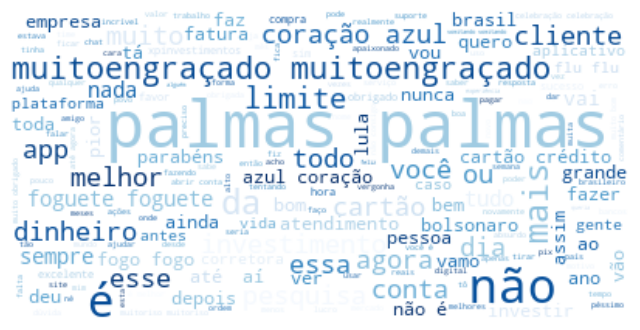

In [102]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenar os tokens em uma única string
tokens_processados = cleaning_output['tokens_processados']
tokens_str = [' '.join(tokens) for tokens in tokens_processados]
texto = ' '.join(tokens_str)

# Criar a nuvem de palavras
wordcloud = WordCloud(background_color='white', colormap='Blues').generate(texto)

# Exibir a nuvem de palavras
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [27]:
result_output.to_csv('..\\output\\bag_of_words.csv',encoding='utf-8', index=False, header=True, )

# Naive bayes

Modelo básico com separação de treino e teste

Acurácia: 0.5487421383647799


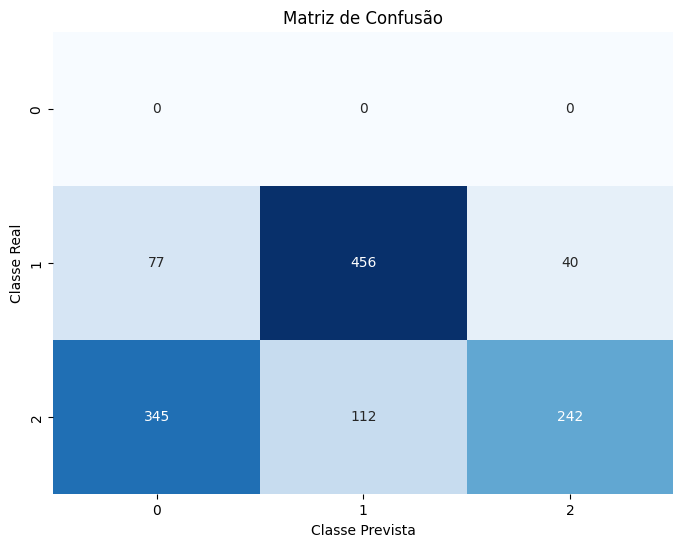

In [86]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

encoder = LabelEncoder()
sentimento_numerico = encoder.fit_transform(cleaning_output['sentimento'])

# Dividir os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(bow_representation, sentimento_numerico, test_size=0.2, random_state=42)

# Criar e treinar o modelo Naive Bayes
modelo = MultinomialNB()
modelo.fit(X_treino, y_treino)

# Fazer a predição usando os dados de teste
predicao_numerica = modelo.predict(X_teste)

# Decodificar as classes preditas
predicao = encoder.inverse_transform(predicao_numerica)

# Avaliar a acurácia do modelo
acuracia = (predicao == cleaning_output['sentimento'].iloc[y_teste]).mean()
print('Acurácia:', acuracia)

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(cleaning_output['sentimento'].iloc[y_teste], predicao)

# Exibir a matriz de confusão visualmente
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()


Acurácia: 0.7098765432098766


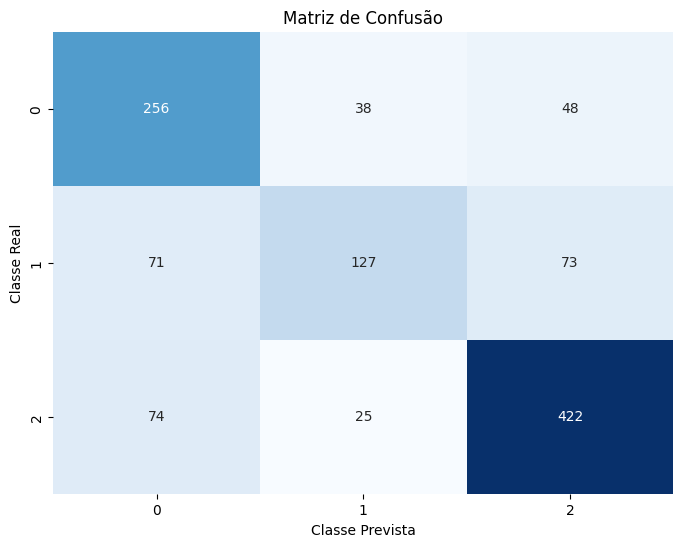

In [87]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sentimento_numerico = df2['sentimento_revisto']

# Dividir os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(bow_representation2, sentimento_numerico, test_size=0.2, random_state=42)

# Criar e treinar o modelo Naive Bayes
modelo = MultinomialNB()
modelo.fit(X_treino, y_treino)

# Fazer a predição usando os dados de teste
predicao = modelo.predict(X_teste)

# Avaliar a acurácia do modelo
acuracia = (predicao == y_teste).mean()
print('Acurácia:', acuracia)

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(y_teste, predicao)

# Exibir a matriz de confusão visualmente
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()


Acurácia: 0.7098765432098766


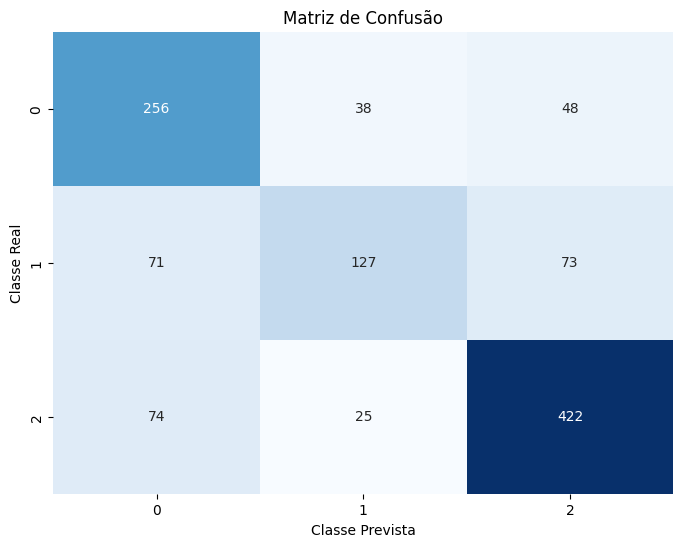

In [85]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sentimento_numerico = df2['sentimento_revisto']

# Dividir os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(bow_representation2, sentimento_numerico, test_size=0.2, random_state=42)

# Criar e treinar o modelo Naive Bayes
modelo = MultinomialNB()
modelo.fit(X_treino, y_treino)

# Fazer a predição usando os dados de teste
predicao_numerica = modelo.predict(X_teste)

# Avaliar a acurácia do modelo
acuracia = (predicao_numerica == y_teste).mean()
print('Acurácia:', acuracia)

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(y_teste, predicao_numerica)

# Exibir a matriz de confusão visualmente
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()


Modelo que utiliza validação cruzada (5 vezes) para treinar e testar o modelo

Acurácia média: 0.7309671728792759


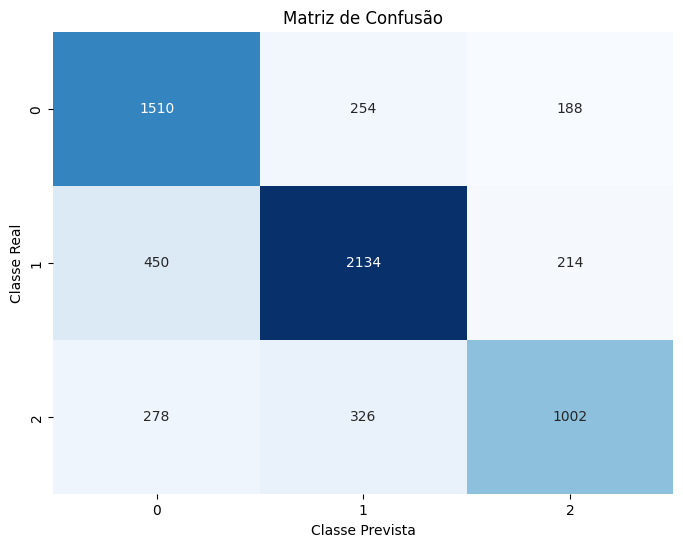

In [84]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

encoder = LabelEncoder()
sentimento_numerico = encoder.fit_transform(cleaning_output['sentimento'])

# Criar o modelo Naive Bayes
modelo = MultinomialNB()

# Avaliar o modelo usando validação cruzada
scores = cross_val_score(modelo, bow_representation, sentimento_numerico, cv=5)

# Exibir a acurácia média do modelo
print('Acurácia média:', scores.mean())

# Realizar a predição usando validação cruzada
predicoes = cross_val_predict(modelo, bow_representation, sentimento_numerico, cv=5)

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(sentimento_numerico, predicoes)

# Exibir a matriz de confusão visualmente
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()


Acurácia média: 0.6525322573866263


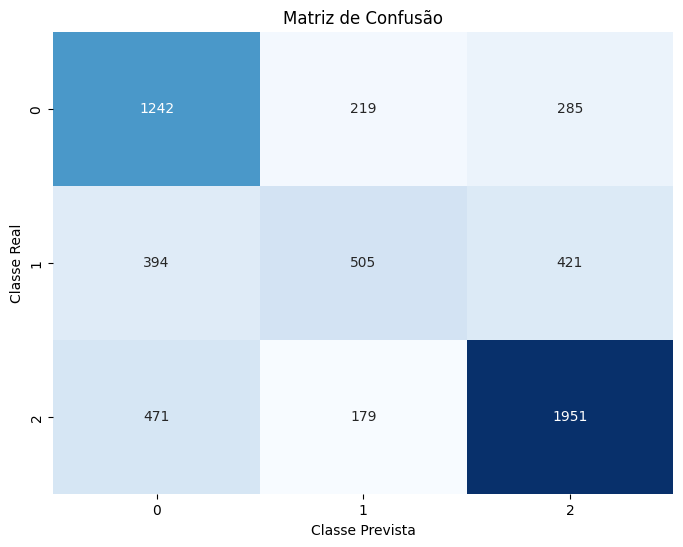

In [83]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sentimento_numerico = df2['sentimento_revisto']

# Criar o modelo Naive Bayes
modelo = MultinomialNB()

# Avaliar o modelo usando validação cruzada
scores = cross_val_score(modelo, bow_representation2, sentimento_numerico, cv=5)

# Exibir a acurácia média do modelo
print('Acurácia média:', scores.mean())

# Realizar a predição usando validação cruzada
predicoes = cross_val_predict(modelo, bow_representation2, sentimento_numerico, cv=5)

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(sentimento_numerico, predicoes)

# Exibir a matriz de confusão visualmente
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()


Utilização do GridSearch com validação cruzada para o modelo

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# encoder = LabelEncoder()
# sentimento_numerico = encoder.fit_transform(cleaning_output['sentimento'])
sentimento = df2['sentimento_revisto']
# Criar o modelo Naive Bayes
modelo = MultinomialNB()

# Especificar a grade de valores de hiperparâmetros para testar
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0]}

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(modelo, param_grid, cv=5)

# Executar a busca em grade
grid_search.fit(bow_representation, sentimento)

# Exibir os melhores hiperparâmetros encontrados
print('Melhores hiperparâmetros:', grid_search.best_params_)

# Exibir a melhor acurácia média encontrada
print('Melhor acurácia média:', grid_search.best_score_)
predicao = grid_search.predict(X_teste)

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(y_teste, predicao)

# Exibir a matriz de confusão visualmente
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

                                              0.0/101.0 MB ? eta -:--:--
                                             0.8/101.0 MB 16.6 MB/s eta 0:00:07
                                             2.0/101.0 MB 25.3 MB/s eta 0:00:04
     -                                       3.3/101.0 MB 26.1 MB/s eta 0:00:04
     -                                       4.7/101.0 MB 27.4 MB/s eta 0:00:04
     --                                      6.2/101.0 MB 28.1 MB/s eta 0:00:04
     --                                      7.3/101.0 MB 27.5 MB/s eta 0:00:04
     --                                      7.5/101.0 MB 23.9 MB/s eta 0:00:04
     ---                                     8.8/101.0 MB 24.4 MB/s eta 0:00:04
     ---                                     9.9/101.0 MB 24.3 MB/s eta 0:00:04
     ----                                   11.0/101.0 MB 25.1 MB/s eta 0:00:04
     ----                                   11.8/101.0 MB 23.4 MB/s eta 0:00:04
     ----                                   12.

ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'C:\\Users\\Inteli\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\catboost\\_catboost.pyd'
Consider using the `--user` option or check the permissions.



Acurácia média: 0.635945368307828


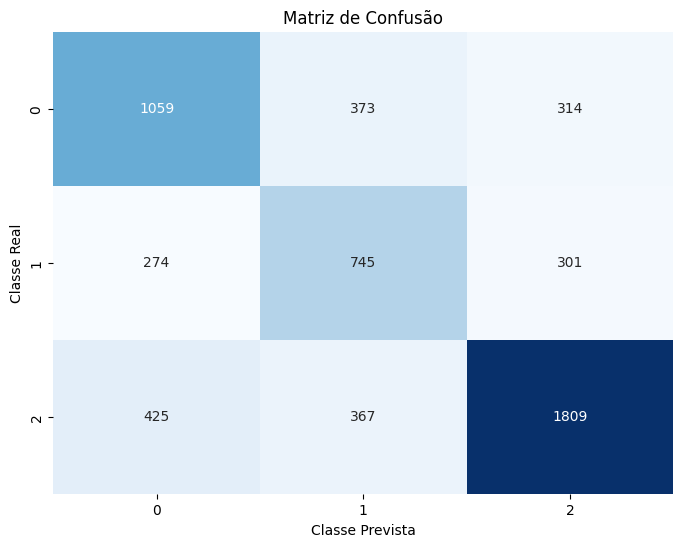

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sentimento_numerico = df2['sentimento_revisto']

# Criar o modelo Random Forest
modelo = RandomForestClassifier()

# Avaliar o modelo usando validação cruzada
scores = cross_val_score(modelo, bow_representation2, sentimento_numerico, cv=5)

# Exibir a acurácia média do modelo
print('Acurácia média:', scores.mean())

# Realizar a predição usando validação cruzada
predicoes = cross_val_predict(modelo, bow_representation2, sentimento_numerico, cv=5)

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(sentimento_numerico, predicoes)

# Exibir a matriz de confusão visualmente
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()


# Modelagem com Rede Neural

In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Converte a representação esparsa do Bag of Words em uma matriz densa
bow_array = bow_representation.toarray()

# Obtém o número de recursos (colunas) da matriz densa
num_features = bow_array.shape[1]
labels = cleaning_output['sentimento']

# Definir a arquitetura da rede neural
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=num_features))  # Camada de entrada
model.add(Dense(1, activation='sigmoid'))  # Camada de saída

# Compilar o modelo com ajuste de hiperparâmetros
learning_rate = 0.001  # Taxa de aprendizado
batch_size = 64  # Tamanho do lote
epochs = 20  # Número de épocas

optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo usando a matriz densa do Bag of Words
model.fit(bow_array, labels, epochs=epochs, batch_size=batch_size)


Epoch 1/20


UnimplementedError: Graph execution error:

Detected at node 'binary_crossentropy/Cast' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Inteli\AppData\Local\Temp\ipykernel_20016\3159118320.py", line 26, in <module>
      model.fit(bow_array, labels, epochs=epochs, batch_size=batch_size)
    File "C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1051, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 2145, in binary_crossentropy
      y_true = tf.cast(y_true, y_pred.dtype)
Node: 'binary_crossentropy/Cast'
Cast string to float is not supported
	 [[{{node binary_crossentropy/Cast}}]] [Op:__inference_train_function_686]

In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Converte a representação esparsa do Bag of Words em uma matriz densa
bow_array = bow_representation.toarray()

# Obtém o número de recursos (colunas) da matriz densa
num_features = bow_array.shape[1]
labels = df2['sentimento_revisto']

# Definir a arquitetura da rede neural
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=num_features))  # Camada de entrada
model.add(Dense(1, activation='sigmoid'))  # Camada de saída

# Compilar o modelo com ajuste de hiperparâmetros
learning_rate = 0.001  # Taxa de aprendizado
batch_size = 64  # Tamanho do lote
epochs = 30  # Número de épocas

optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo usando a matriz densa do Bag of Words
model.fit(bow_array, labels, epochs=epochs, batch_size=batch_size)


Epoch 1/30
89/89 [==============================] - 1s 9ms/step - loss: 0.2390 - accuracy: 0.3976
Epoch 2/30
89/89 [==============================] - 1s 10ms/step - loss: -0.9786 - accuracy: 0.4424
Epoch 3/30
89/89 [==============================] - 1s 11ms/step - loss: -2.8946 - accuracy: 0.4567
Epoch 4/30
89/89 [==============================] - 1s 11ms/step - loss: -5.8461 - accuracy: 0.4650
Epoch 5/30
89/89 [==============================] - 1s 11ms/step - loss: -9.9557 - accuracy: 0.4620
Epoch 6/30
89/89 [==============================] - 1s 11ms/step - loss: -15.1665 - accuracy: 0.4681
Epoch 7/30
89/89 [==============================] - 1s 11ms/step - loss: -21.4439 - accuracy: 0.4609
Epoch 8/30
89/89 [==============================] - 1s 11ms/step - loss: -28.7952 - accuracy: 0.4621
Epoch 9/30
89/89 [==============================] - 1s 11ms/step - loss: -37.1802 - accuracy: 0.4604
Epoch 10/30
89/89 [==============================] - 1s 11ms/step - loss: -46.5803 - accuracy: 0.4